In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

import numpy as np
import pandas as pd

In [2]:
import json
from pprint import pprint

with open('/Users/danielkershaw/Downloads/part-00002') as data_file:    
    data = json.load(data_file)
    
result_act = pd.read_json(data["result_act"]).sort_index()
result_user = pd.read_json(data["result_user"]).sort_index()

In [ ]:
binned_act = result_act.groupby(pd.cut(result_act["depth"], np.arange(min(result_act["depth"]), max(result_act["depth"]), 10))).mean()
binned_user = result_user.groupby(pd.cut(result_user["depth"], np.arange(min(result_user["depth"]), max(result_user["depth"]), 10))).mean()

binned_act_err = result_act.groupby(pd.cut(result_act["depth"], np.arange(min(result_act["depth"]), max(result_act["depth"]), 10))).std()
binned_user_err = result_user.groupby(pd.cut(result_user["depth"], np.arange(min(result_user["depth"]), max(result_user["depth"]), 10))).std()


fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(10,15))

def ratio(n, w):
    if n == 0:
        return 0

    if w == 0:
        return 0

    return  n/w

def rowRatio(data):
    d = {
        "m1":ratio(data["m1"], data["m1"]),
        "m2":ratio(data["m2"], data["m1"]),
        "m3":ratio(data["m3"], data["m1"]),
        "m4":ratio(data["m4"], data["m1"])
    }
    return pd.Series(d)

usagedominance = binned_act[["usagedominance"]]
usagedominance.columns = ['m1']

usagedominance_err = binned_act_err[["usagedominance"]]
usagedominance_err.columns = ['m1']

plts = usagedominance.plot(yerr=usagedominance_err, ax=axes[0,0], style='-', logx = True)
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{r}{r_{M1}}$', rotation=0)

userusagedominance = binned_user[["userusagedominance"]]
userusagedominance.columns = ['m1']

userusagedominance_err = binned_user_err[["userusagedominance"]]
userusagedominance_err.columns = ['m1']
# userusagedominance = userusagedominance.apply(rowRatio,1)

plts = userusagedominance.plot(yerr=userusagedominance_err, ax=axes[0,1], style='-', logx = True)
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{g}{g_{M1}}$', rotation=0)

usageEntorpy = binned_act[["usageEntorpy"]]
usageEntorpy.columns = ['m1']
usageEntorpy_err = binned_act_err[["usageEntorpy"]]
usageEntorpy_err.columns = ['m1']

plts = usageEntorpy.plot(yerr=usageEntorpy_err, ax=axes[1,0], style='o', logx = True)
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{H^p}{N_{M1}^p}$', rotation=0)

userUsageEntorpy = binned_user[["userUsageEntorpy"]]
userUsageEntorpy.columns = ['m1']
# userUsageEntorpy = userUsageEntorpy.apply(rowRatio,1)

plts = userUsageEntorpy.plot(ax=axes[1,1], style='o', logx = True)
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{H^u}{N_{M1}^u}$', rotation=0)

ActivateionExposure = binned_act[["ActivateionExposure"]]
ActivateionExposure.columns = ['m1']
# ActivateionExposure.loc[:, 'm1'] = ActivateionExposure.loc[:, 'm1'].rolling(window=100,center=False).mean()

plts = ActivateionExposure.plot(ax=axes[2,0], style='o', logx = True)
plts.set_xlabel('Posts (P)')
plts.set_ylabel(r'$\frac{N^p}{N_{M1}^p}$', rotation=0)

UserExposure = binned_user[["UserExposure"]]
UserExposure.columns = ['m1']
# UserExposure.loc[:, 'm1'] = UserExposure.loc[:, 'm1'].rolling(window=100,center=False).mean()

plts = UserExposure.plot(ax=axes[2,1], style='o', logx = True)
plts.set_xlabel('Users (U)')
plts.set_ylabel(r'$\frac{N^u}{N_{M1}^u}$', rotation=0)

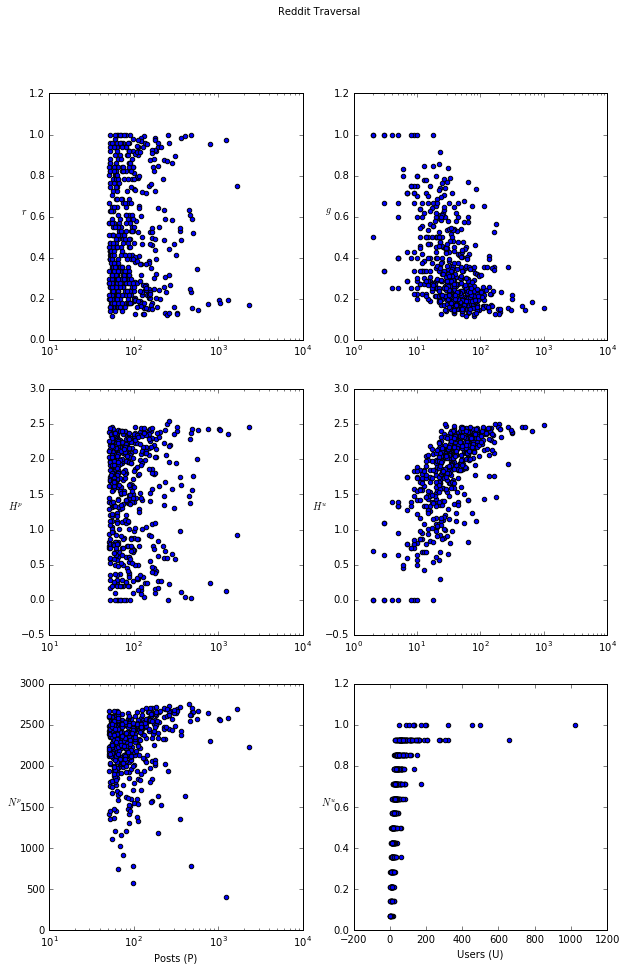

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
fig.suptitle('Reddit Traversal')

plts = result_act.plot(ax=axes[0,0], style='o', logx = True, y="usagedominance", x="depth", kind="scatter")
plts.set_xlabel('')
plts.set_ylabel(r'$r$', rotation=0)

plts = result_user.plot(ax=axes[0,1], style='o', logx = True, y="userusagedominance", x="depth", kind="scatter")
plts.set_xlabel('')
plts.set_ylabel(r'$g$', rotation=0)

plts = result_act.plot(ax=axes[1,0], style='o', logx = True, y="usageEntorpy", x="depth", kind="scatter")
plts.set_xlabel('')
plts.set_ylabel(r'$H^p$', rotation=0)

plts = result_user.plot(ax=axes[1,1], style='o', logx = True, y="userUsageEntorpy", x="depth", kind="scatter")
plts.set_xlabel('')
plts.set_ylabel(r'$H^u$', rotation=0)

plts = result_act.plot(ax=axes[2,0], style='o', logx = True, y="surface_mean", x="depth", kind="scatter")
plts.set_xlabel('Posts (P)')
plts.set_ylabel(r'$N^p$', rotation=0)

plts = result_user.plot(ax=axes[2,1], style='o', logx = False, y="inffectedCommunitiesnor", x="depth", kind="scatter")
plts.set_xlabel('Users (U)')
plts.set_ylabel(r'$N^u$', rotation=0)

In [6]:
result_user.head()

,ActivateionExposure,UserExposure,UserExposure_cv,UserExposure_mean,UserExposure_median,UserExposure_min,UserExposure_var,community,degree,degree_cv,...,time_step_max,time_step_mean,time_step_median,time_step_min,time_step_var,usageEntorpy,usagedominance,userUsageEntorpy,userusagedominance,word
0,14,4,1.581139,0,2.0,4,2.500000,9,655,775.995296,...,8.381546,3.092981,1.829086,0.332206,13.063823,0.000000,1.000000,0.000000,1.000000,ervia
1,23,10,4.453135,0,8.0,17,19.830409,3,625,508.624294,...,3.096124,0.795263,0.508094,0.034458,0.677297,1.798045,0.326531,1.856270,0.380952,dodatek
2,40,13,4.049691,0,4.0,13,16.400000,8,846,547.193811,...,2.531451,0.911950,0.454623,0.001087,1.015655,1.214661,0.476190,1.263479,0.466667,docomo
3,32,10,3.509172,0,3.0,10,12.314286,4,742,437.561043,...,1.380850,0.692277,0.714087,0.000366,0.188848,1.851679,0.341463,2.187322,0.187500,dlam
4,40,28,7.096232,0,7.0,28,50.356506,4,1032,345.997033,...,0.928537,0.066096,0.002053,0.000069,0.044511,1.599980,0.588235,1.860518,0.473684,djuricic
